In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dosya Yükleme(Kerasın içinde hazır bu dosya)

In [6]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 48s 0us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

### Şu anda y_test 2 boyutlu, Bize 1 boyut lazım

In [10]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

### Veriye Bakalım

In [13]:
resim_siniflari = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(resim_siniflari[y[index]])

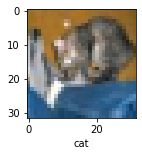

In [15]:
plot_sample(X_test, y_test, 0)

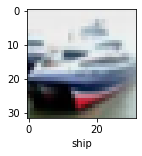

In [16]:
plot_sample(X_test, y_test, 1)

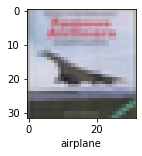

In [19]:
plot_sample(X_test, y_test, 3)

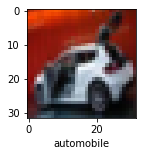

In [18]:
plot_sample(X_test, y_test, 6)

### Normalization

Fotoğraflar RGB olarak 3 kanal ve her bir pixel 0-255 arasında değer aldığı için normalizasyonda her şeyi 255e bölmek yeterli

In [21]:
X_train = X_train / 255
X_test = X_test / 255

### CNN Tasarımı

In [22]:
dl_model = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),   
    
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = "softmax" )
])

In [23]:
dl_model.compile(optimizer = "adam",
                loss= "sparse_categorical_crossentropy",
                metrics = ["accuracy"])

In [24]:
dl_model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4716 - accuracy: 0.4729
Epoch 2/5
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1225 - accuracy: 0.6052
Epoch 3/5
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9884 - accuracy: 0.6547
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9045 - accuracy: 0.6855
Epoch 5/5
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8341 - accuracy: 0.7113


In [25]:
dl_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9240 - accuracy: 0.6843


[0.9240332841873169, 0.6843000054359436]

In [28]:
y_pred = dl_model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


## Sonuçlar

In [29]:
y_predictions_siniflari = [np.argmax(element) for element in y_pred]

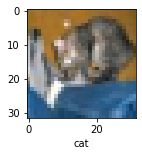

In [30]:
plot_sample(X_test, y_test, 0)

In [32]:
resim_siniflari[y_predictions_siniflari[0]]

'cat'

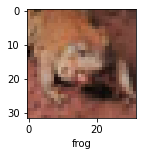

In [31]:
plot_sample(X_test, y_test, 5)

In [33]:
resim_siniflari[y_predictions_siniflari[5]]

'frog'

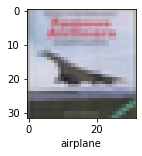

In [34]:
plot_sample(X_test, y_test, 3)

In [35]:
resim_siniflari[y_predictions_siniflari[3]]

'airplane'

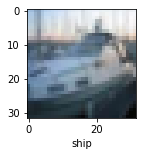

In [36]:
plot_sample(X_test, y_test, 2)

In [37]:
resim_siniflari[y_predictions_siniflari[2]]

'ship'

### Hatalı Sonuçlar

Daha yüksek çözünürlüklü resimler ve/veya daha fazla resim kullanılırsa hata oranı çok daha düşebilir.O durumda da modelleme süresi uzar

In [40]:
y_test[11:20]

array([9, 5, 7, 9, 8, 5, 7, 8, 6], dtype=uint8)

In [41]:
y_predictions_siniflari[11:20]

[9, 5, 7, 9, 8, 5, 3, 8, 6]

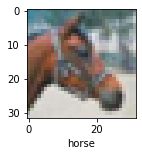

In [42]:
plot_sample(X_test, y_test, 17)

In [47]:
resim_siniflari[y_predictions_siniflari[17]]

'cat'

In [45]:
y_test[21:30]

array([0, 4, 9, 5, 2, 4, 0, 9, 6], dtype=uint8)

In [46]:
y_predictions_siniflari[21:30]

[0, 4, 9, 4, 6, 4, 0, 9, 6]

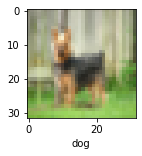

In [48]:
plot_sample(X_test, y_test, 24)

In [49]:
resim_siniflari[y_predictions_siniflari[24]]

'deer'

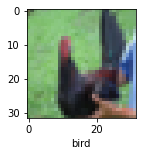

In [50]:
plot_sample(X_test, y_test, 25)

In [51]:
resim_siniflari[y_predictions_siniflari[25]]

'frog'